In [ ]:
# No Data upload required

**Load the Dataset**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn import datasets
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
from sklearn.model_selection import train_test_split
from sklearn import tree

**Splitting Data into Training and Test Sets**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'],test_size=0.33)
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
138                6.0               3.0                4.8               1.8
5                  5.4               3.9                1.7               0.4
7                  5.0               3.4                1.5               0.2
148                6.2               3.4                5.4               2.3
85                 6.0               3.4                4.5               1.6
..                 ...               ...                ...               ...
89                 5.5               2.5                4.0               1.3
140                6.7               3.1                5.6               2.4
86                 6.7               3.1                4.7               1.5
32                 5.2               4.1                1.5               0.1
87                 6.3               2.3                4.4               1.3

[100 rows x 4 columns]


**Scikit-learn 4-Step Modeling Pattern**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2) #Make an instance of the Model
clf.fit(X_train, Y_train) #Train the model on the data


# Predict for 1 observation
#clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
#clf.predict(X_test[0:10])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Measuring Model Performance**

In [ ]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.9


**Tuning the Depth of a Tree**

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
print(accuracy)



[0.62, 0.9, 0.9, 0.92, 0.92]


In [ ]:
#Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

             feature  importance
3   petal width (cm)       0.535
2  petal length (cm)       0.460
1   sepal width (cm)       0.005
0  sepal length (cm)       0.000


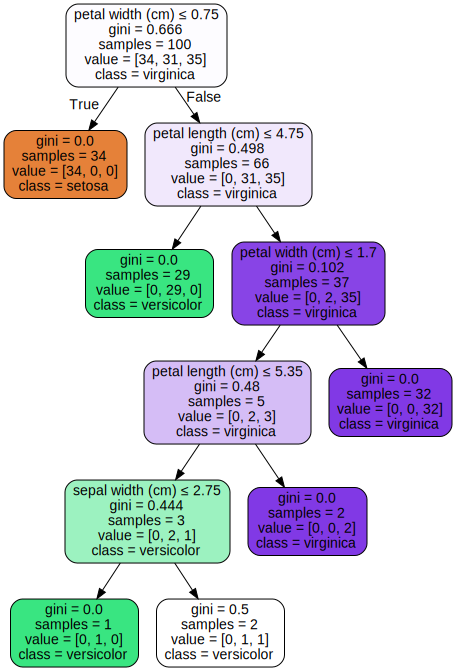

In [ ]:
import graphviz 
iris = datasets.load_iris()
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

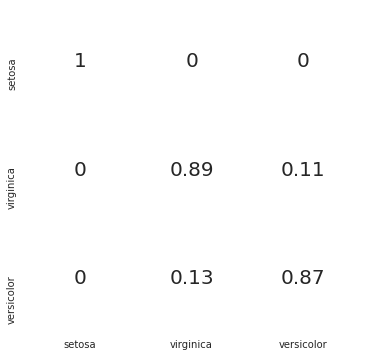

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix

cm_norm = confusion_matrix(Y_test, y_pred,normalize='true')

import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt



df_cm = pd.DataFrame(cm_norm, index = ['setosa','virginica','versicolor'],
                  columns = ['setosa','virginica','versicolor'])


plt.figure(figsize = (6,6))

with sns.axes_style('white'):
    sns.heatmap(df_cm,
                cbar=False,
                square=False,
                annot=True,
                annot_kws={"size": 20},
                cmap=ListedColormap(['white']),
                linewidths=0.5)
    sns.set(font_scale=1.8)

In [ ]:
def input_test_seq():
    sepal_length = float(input('Enter the Sepal length in cm :'))
    while True:
        if float(sepal_length)< 0 or float(sepal_length) > 10:
            print('Inalid Entry. Enter Sepal Length <10 \n')
            sepal_length = float(input('Enter the sepal length in cm :'))
            continue
        else:
            break

    sepal_width = float(input('Enter the Sepal width in cm :'))
    while True:
        if float(sepal_width) < 0 or float(sepal_width) > 10:
            print('Invalid entry')
            sepal_width = float(input('Enter the sepal width in cm :'))
            continue
        else:
            break

    petal_length = float(input('Enter the petal length in cm :'))
    while True:
        if float(petal_length) <0 or float(petal_length) > 10:
            print('Inalid Entry. Please enter value less than 10')
            petal_length = float(input('Enter the petal length in cm :'))
            continue
        else:
            break

    petal_width = float(input('Enter the petal width in cm :'))
    while True:
        if float(petal_width) < 0 or float(petal_width) > 10:
            print('Invalid entry')
            petal_width = float(input('Enter the petal width in cm :'))
            continue
        else:
            break

    predict_features = [sepal_length,sepal_width,petal_length,petal_width]
    y_pred = clf.predict(np.array(predict_features).reshape(1,-1))
    result_category = y_pred

    if result_category == 0:
        value_prediction = "Iris-setosa"
    elif result_category == 1:
        value_prediction = "Iris-versicolor"
    elif result_category == 2:
        value_prediction = "Iris-virginica"
    return value_prediction

flower_prediction = input_test_seq()
print("That flower is most likely", flower_prediction)

Enter the Sepal length in cm :5.1
Enter the Sepal width in cm :3.5
Enter the petal length in cm :1.4
Enter the petal width in cm :.2


'Iris-setosa'